# <center> Tree Models </center>

### Decision Tree basics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

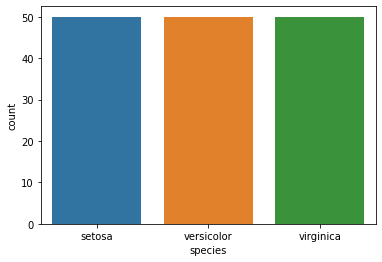

In [5]:
sns.countplot(data=iris_df, x='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

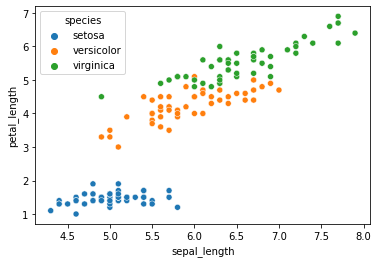

In [6]:
sns.scatterplot(data=iris_df,
                x= 'sepal_length',
                y= 'petal_length',
               hue= 'species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

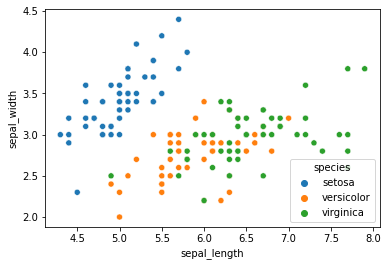

In [7]:
sns.scatterplot(data=iris_df,
                x= 'sepal_length',
                y= 'sepal_width',
               hue= 'species')

In [8]:
#biến đổi cột species thành dạng số
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.species.unique()) # create map dictionary
iris_df.species = le.transform(iris_df.species) #map data
iris_df.species.unique()
#cách biến đổi giống hàm .map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

array([0, 1, 2])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_df [['sepal_length', 'sepal_width']],
                                                   iris_df['species'],
                                                   test_size=0.2,
                                                   random_state=42)

In [11]:
#gọi cái cây đấy ra
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



- F-score của giống setosa là có giá trị khá tốt, nhưng 2 giống còn lại thì ko. Vậy nên F1-score trung bình k cao

In [13]:
#vậy nên ta sẽ thêm max_depth, max_features để cải thiện MH

In [14]:
tree = DecisionTreeClassifier(max_depth=5, #max_depth: giới hạn số tầng của cây đó
                             max_features=2) #định nghĩa số lượng feature sd để xây nên cái cây )
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [15]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.78      0.64         9
           2       0.75      0.55      0.63        11

    accuracy                           0.73        30
   macro avg       0.76      0.74      0.74        30
weighted avg       0.77      0.73      0.74        30



In [16]:
confusion_matrix(y_test, y_pred)

array([[9, 1, 0],
       [0, 7, 2],
       [0, 5, 6]], dtype=int64)

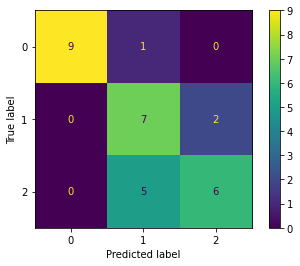

In [17]:
plot_confusion_matrix(tree, X_test, y_test)

In [18]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()#nếu lười thêm plt.show() thì có thể định nghĩa nó trước (ở bước import pandas, numpy,...) bằng lệnh %matplotlib inline

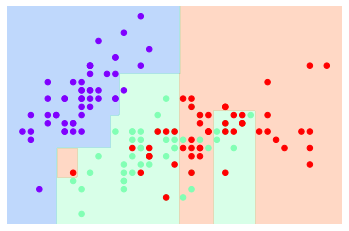

In [19]:
visualize_classifier(tree,iris_df [['sepal_length', 'sepal_width']],iris_df['species'])

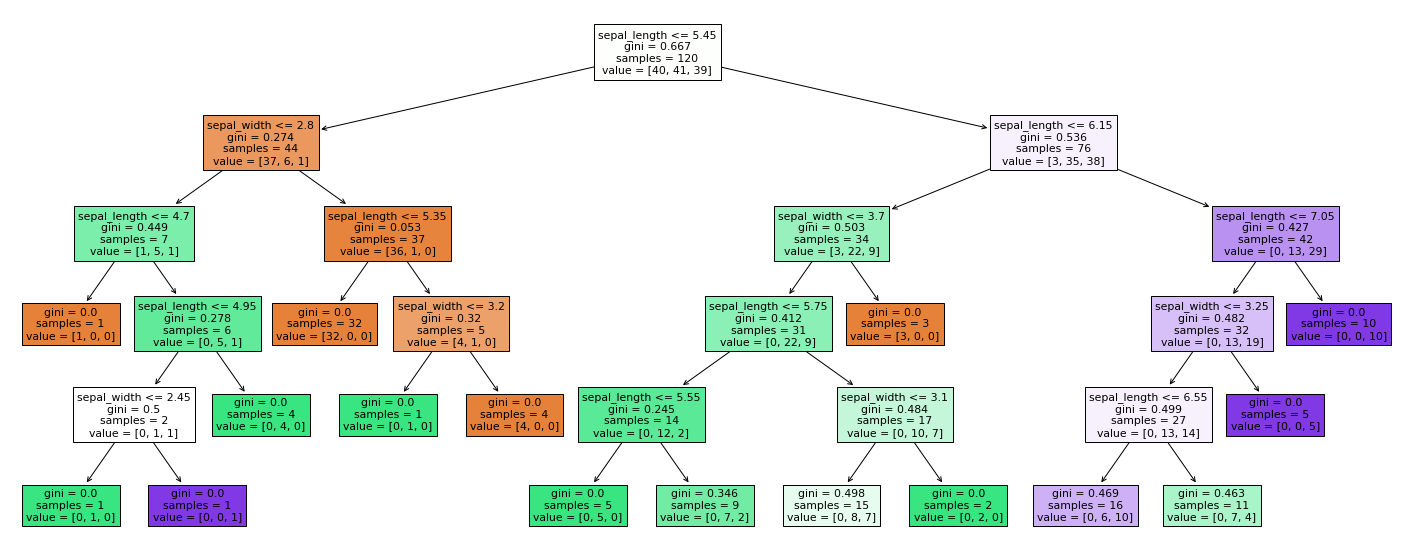

In [20]:
plt.figure(figsize=(25,10))
_ = plot_tree (tree, feature_names= X_train.columns, max_depth = 5, filled= True)
plt.show()

In [21]:
#Hiểu đc GINI, Entropy, Infomation Gain

In [22]:
#Gía trị rời rạc, Bài toán Phân loại
#giá trị liên tục, bài toán hồi quy
#k có nhãn, là bài toán ko giám sát

##### Thước đo đánh giá việc chia dữ liệu trong bài toán dạng cây: GINI, Entropy
- GINI là chỉ số thể hiện mức độ phân loại sau khi chọn ngẫu nhiên một phần tử từ tập dữ liệu

- Entropy là thước đo đánh giá sự hỗn loạn/độ nhiễu của dữ liệu
    + Giá trị Entropy càng cao thì độ hỗn loạn của hệ thống càng cao và ngược lại, nếu càng thấp thì hệ thống càng trật tự (nằm trong khoảng [0,1])
- Information Gain (Thu thập thông tin)
    + Dựa trên sự giảm của Entropy khi tập dữ liệu được phân chia trên một thuộc tính. Để xây dựng cây ra quyết định, ta phải tìm tất cả thuộc tính về Imformation gain cao nhất.
    + Bản chất là 𝐺𝑎𝑖𝑛(𝑥, 𝑆) = 𝐸𝑛𝑡𝑟𝑜𝑝𝑦 (𝑛𝑖/𝑁) − 𝐸𝑛𝑡𝑟𝑜𝑝𝑦(𝑥)


### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)